In [1]:
import pandas as pd
import io
import requests
from datetime import timedelta, datetime, date
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\belac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#read in Department of Health Data and build list of dates and cities
url="https://www.vdh.virginia.gov/content/uploads/sites/182/2020/05/VDH-COVID-19-PublicUseDataset-Cases.csv"
df=pd.read_csv(url)
dates=df["Report Date"].unique()
df

,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths
0,7/11/2020,51001,Accomack,Eastern Shore,1042,72,14
1,7/11/2020,51003,Albemarle,Thomas Jefferson,533,37,10
2,7/11/2020,51005,Alleghany,Alleghany,40,5,2
3,7/11/2020,51007,Amelia,Piedmont,49,12,1
4,7/11/2020,51009,Amherst,Central Virginia,40,3,0
...,...,...,...,...,...,...,...
15556,3/17/2020,51800,Suffolk,Western Tidewater,0,0,0
15557,3/17/2020,51810,Virginia Beach,Virginia Beach,4,0,0
15558,3/17/2020,51820,Waynesboro,Central Shenandoah,0,0,0
15559,3/17/2020,51830,Williamsburg,Peninsula,1,0,0


In [3]:
dates

array(['7/11/2020', '7/10/2020', '7/9/2020', '7/8/2020', '7/7/2020',
       '7/6/2020', '7/5/2020', '7/4/2020', '7/3/2020', '7/2/2020',
       '7/1/2020', '6/30/2020', '6/29/2020', '6/28/2020', '6/27/2020',
       '6/26/2020', '6/25/2020', '6/24/2020', '6/23/2020', '6/22/2020',
       '6/21/2020', '6/20/2020', '6/19/2020', '6/18/2020', '6/17/2020',
       '6/16/2020', '6/15/2020', '6/14/2020', '6/13/2020', '6/12/2020',
       '6/11/2020', '6/10/2020', '6/9/2020', '6/8/2020', '6/7/2020',
       '6/6/2020', '6/5/2020', '6/4/2020', '6/3/2020', '6/2/2020',
       '6/1/2020', '5/31/2020', '5/30/2020', '5/29/2020', '5/28/2020',
       '5/27/2020', '5/26/2020', '5/25/2020', '5/24/2020', '5/23/2020',
       '5/22/2020', '5/21/2020', '5/20/2020', '5/19/2020', '5/18/2020',
       '5/17/2020', '5/16/2020', '5/15/2020', '5/14/2020', '5/13/2020',
       '5/12/2020', '5/11/2020', '5/10/2020', '5/9/2020', '5/8/2020',
       '5/7/2020', '5/6/2020', '5/5/2020', '5/4/2020', '5/3/2020',
       '5/2/2020'

# build list of dates

## April only

In [62]:
#built initial list of dates for April
start_date = '4/01/2020'
end_date = '5/01/2020'
april_dates=[]
for date in dates:
    if (date >= start_date and date < end_date):
        april_dates.append(date)
april_dates2 = pd.to_datetime(april_dates)

date_ranges=[]
for date in april_dates2:
    date_ranges.append({str(date)[0:10]: str(date + timedelta(days=1))[0:10]})
len(date_ranges)

# # #break into key values for setting Since and Until on GoT
# # for i in date_ranges:
# #     for key in i:
# #         print(key, '->', i[key])

30

In [5]:
# #build list of dates + 14 days in order to pull training data (forecast)
# df['Report Date'] = pd.to_datetime(df['Report Date'])
# start_date = '03-31-2020'
# end_date = '05-15-2020'
# mask = (df['Report Date'] > start_date) & (df['Report Date'] < end_date)
# april_data = df.loc[mask]
# april_data.drop(["FIPS","VDH Health District"], axis=1)


In [6]:
# #build list of + 14 data in April
# cases_14=[]
# hosp_14=[]
# death_14=[]

# start_date = datetime(2020,4,14)
# end_date = datetime(2020,5,16)

# for i in april_data.index: 
#     if april_data["Report Date"][i] > start_date and april_data["Report Date"][i] < end_date:
#         cases_14.append(april_data["Total Cases"][i])
#         hosp_14.append(april_data["Hospitalizations"][i])
#         death_14.append(april_data["Deaths"][i])       


## entire pandemic

In [59]:
#built initial list of dates for pandemic
start_date = '3/17/2020'
end_date = '7/9/2020'
covid_dates=[]
for date in dates:
    if (date >= start_date and date < end_date):
        covid_dates.append(date)
covid_dates_df = pd.to_datetime(covid_dates)
covid_dates_df
# # create a dict of {day1: day2}, need for twitter 
# date_ranges2=[]
# for date in covid_dates_df:
#     date_ranges2.append({str(date)[0:10]: str(date + timedelta(days=1))[0:10]})
# date_ranges2

[{'2020-07-11': '2020-07-12'},
 {'2020-07-10': '2020-07-11'},
 {'2020-07-08': '2020-07-09'},
 {'2020-07-07': '2020-07-08'},
 {'2020-07-06': '2020-07-07'},
 {'2020-07-05': '2020-07-06'},
 {'2020-07-04': '2020-07-05'},
 {'2020-07-03': '2020-07-04'},
 {'2020-07-02': '2020-07-03'},
 {'2020-07-01': '2020-07-02'},
 {'2020-06-30': '2020-07-01'},
 {'2020-06-29': '2020-06-30'},
 {'2020-06-28': '2020-06-29'},
 {'2020-06-27': '2020-06-28'},
 {'2020-06-26': '2020-06-27'},
 {'2020-06-25': '2020-06-26'},
 {'2020-06-24': '2020-06-25'},
 {'2020-06-23': '2020-06-24'},
 {'2020-06-22': '2020-06-23'},
 {'2020-06-21': '2020-06-22'},
 {'2020-06-20': '2020-06-21'},
 {'2020-06-19': '2020-06-20'},
 {'2020-06-18': '2020-06-19'},
 {'2020-06-17': '2020-06-18'},
 {'2020-06-16': '2020-06-17'},
 {'2020-06-15': '2020-06-16'},
 {'2020-06-14': '2020-06-15'},
 {'2020-06-13': '2020-06-14'},
 {'2020-06-12': '2020-06-13'},
 {'2020-06-11': '2020-06-12'},
 {'2020-06-10': '2020-06-11'},
 {'2020-06-09': '2020-06-10'},
 {'2020-

In [60]:
#build list of dates + 14 days in order to pull training data (forecast)
df['Report Date'] = pd.to_datetime(df['Report Date'])
start_date = '03-31-2020'
end_date = '07-09-2020'
mask = (df['Report Date'] >= start_date) & (df['Report Date'] < end_date)
covid_data = df.loc[mask]
covid_data.drop(["FIPS","VDH Health District"], axis=1)
covid_data.reset_index()

,index,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths
0,399,2020-07-08,51001,Accomack,Eastern Shore,1042,72,14
1,400,2020-07-08,51003,Albemarle,Thomas Jefferson,498,36,10
2,401,2020-07-08,51005,Alleghany,Alleghany,39,5,2
3,402,2020-07-08,51007,Amelia,Piedmont,48,11,1
4,403,2020-07-08,51009,Amherst,Central Virginia,38,3,0
...,...,...,...,...,...,...,...,...
13295,13694,2020-03-31,51800,Suffolk,Western Tidewater,4,0,0
13296,13695,2020-03-31,51810,Virginia Beach,Virginia Beach,65,11,2
13297,13696,2020-03-31,51820,Waynesboro,Central Shenandoah,2,0,0
13298,13697,2020-03-31,51830,Williamsburg,Peninsula,8,2,1


In [5]:
#build list of + 14 data in April
cases_14=[]
hosp_14=[]
death_14=[]

start_date = datetime(2020,3,31)
end_date = datetime(2020,7,9)

for i in covid_data.index: 
    if covid_data["Report Date"][i] >= start_date and covid_data["Report Date"][i] < end_date:
        cases_14.append(covid_data["Total Cases"][i])
        hosp_14.append(covid_data["Hospitalizations"][i])
        death_14.append(covid_data["Deaths"][i])   
len(cases_14)

13300

In [6]:
start_date = '03-16-2020'
end_date = '06-25-2020'
mask = (df['Report Date'] > start_date) & (df['Report Date'] < end_date)
df3= df.loc[mask]
df3.reset_index()

,index,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths
0,2261,2020-06-24,51001,Accomack,Eastern Shore,1034,69,14
1,2262,2020-06-24,51003,Albemarle,Thomas Jefferson,359,24,8
2,2263,2020-06-24,51005,Alleghany,Alleghany,31,5,2
3,2264,2020-06-24,51007,Amelia,Piedmont,42,10,1
4,2265,2020-06-24,51009,Amherst,Central Virginia,31,3,0
...,...,...,...,...,...,...,...,...
13295,15556,2020-03-17,51800,Suffolk,Western Tidewater,0,0,0
13296,15557,2020-03-17,51810,Virginia Beach,Virginia Beach,4,0,0
13297,15558,2020-03-17,51820,Waynesboro,Central Shenandoah,0,0,0
13298,15559,2020-03-17,51830,Williamsburg,Peninsula,1,0,0


In [7]:
# df2=covid_data.drop(covid_data.index[132:1994])
df3['Total Cases +14d'] = cases_14
df3['Hosp +14d'] = hosp_14
df3['Death +14d'] = death_14
covid_clean=df3.drop(["FIPS","VDH Health District"], axis=1)
covid_clean

C:\Users\belac\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\belac\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\belac\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Report Date,Locality,Total Cases,Hospitalizations,Deaths,Total Cases +14d,Hosp +14d,Death +14d
2261,2020-06-24,Accomack,1034,69,14,1042,72,14
2262,2020-06-24,Albemarle,359,24,8,498,36,10
2263,2020-06-24,Alleghany,31,5,2,39,5,2
2264,2020-06-24,Amelia,42,10,1,48,11,1
2265,2020-06-24,Amherst,31,3,0,38,3,0
...,...,...,...,...,...,...,...,...
15556,2020-03-17,Suffolk,0,0,0,4,0,0
15557,2020-03-17,Virginia Beach,4,0,0,65,11,2
15558,2020-03-17,Waynesboro,0,0,0,2,0,0
15559,2020-03-17,Williamsburg,1,0,0,8,2,1


# Pull Tweets

In [63]:
dates_1=[]
dates_2=[]
dates_3=[]
   
for i in date_ranges[0:11]:
    dates_1.append(i)  
for i in date_ranges[11:21]:
    dates_2.append(i)  
for i in date_ranges[21:30]:
    dates_3.append(i)  

In [14]:
# #fetch tweets from just RVA for (4/1/20: 3417 Tweets) (april:3000 )
# import GetOldTweets3 as got
# city='Richmond, VA'

# text_tweets=[]
# for date in date_ranges:
#     for key in date:        
#         tweetCriteria = got.manager.TweetCriteria().setNear(city).setSince(key).setUntil(date[key]).setMaxTweets(1000)
#         tweets = got.manager.TweetManager.getTweets(tweetCriteria)
#         for tweet in tweets:
#             text_tweets.append([tweet.date, tweet.text, tweet.hashtags, city])

# tweets_df = pd.DataFrame(text_tweets, columns = ['Datetime', 'Text','hashtags', 'city'])
# tweets_df['tokenized_tweets'] = tweets_df.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1)
# tweets_df['date'] = tweets_df['Datetime'].dt.date
# tweets_df.to_csv('va_April.csv')

In [65]:
#fetch tweets from just RVA for (4/1/20: 3417 Tweets) (april:30,000 )
import GetOldTweets3 as got
import time
city='Richmond, VA'

print ('starting first download')
text_tweets1=[]    
for date in dates_1:
    for key in date:        
        tweetCriteria = got.manager.TweetCriteria().setNear(city).setSince(key).setUntil(date[key]).setMaxTweets(500)
        firsttweets = got.manager.TweetManager.getTweets(tweetCriteria)
        for tweet in firsttweets:
            text_tweets1.append([tweet.date, tweet.text, tweet.hashtags, city])

tweets_df1 = pd.DataFrame(text_tweets1, columns = ['Datetime', 'Text','hashtags', 'city'])
tweets_df1['date'] = tweets_df1['Datetime'].dt.date
# tweets_df1.to_csv('va_April.csv')
    
time.sleep(600)
    
print ('starting second download')
text_tweets2=[]    
for date in dates_2:
    for key in date:        
        tweetCriteria = got.manager.TweetCriteria().setNear(city).setSince(key).setUntil(date[key]).setMaxTweets(500)
        sectweets = got.manager.TweetManager.getTweets(tweetCriteria)
        for tweet in sectweets:
            text_tweets2.append([tweet.date, tweet.text, tweet.hashtags, city])

tweets_df2 = pd.DataFrame(text_tweets2, columns = ['Datetime', 'Text','hashtags', 'city'])
tweets_df2['date'] = tweets_df2['Datetime'].dt.date
# tweets_df1.to_csv('va_April.csv')
    
time.sleep(600)
    
print ('starting third download')

text_tweets3=[] 
for date in dates_3:
    for key in date:        
        tweetCriteria = got.manager.TweetCriteria().setNear(city).setSince(key).setUntil(date[key]).setMaxTweets(500)
        thirdtweets = got.manager.TweetManager.getTweets(tweetCriteria)
        for tweet in thirdtweets:
            text_tweets3.append([tweet.date, tweet.text, tweet.hashtags, city])

tweets_df3 = pd.DataFrame(text_tweets3, columns = ['Datetime', 'Text','hashtags', 'city'])
tweets_df3['date'] = tweets_df3['Datetime'].dt.date
# tweets_df1.to_csv('va_April.csv')
    
# time.sleep(600)
    
df=pd.concat([tweets_df1,tweets_df2,tweets_df3])
df.to_csv('va_April_15000.csv')

starting first download
starting second download
starting third download


## basic word count

In [16]:
# # counters
# word_count=[]
# mask_count=[]
# counter=0
# mask_counter=0
# for i in tweets_df["tokenized_tweets"]: 
#     for word in i:
#         if word:
#             counter += 1
#         if word == "mask":
#             mask_counter += 1
#     word_count.append(counter)
#     mask_count.append(mask_counter)
#     counter = 0
#     mask_counter=0
# len(mask_count)

In [17]:
# tweets_df['word count']=word_count
# tweets_df['mask count']=mask_count
# tweets_df

In [18]:
# count_df=tweets_df[['city','word count','mask count']]
# grouped_df=count_df.groupby(['city']).sum()
# grouped_df.head(50)

# clean DoH data to (only RVA) 


In [19]:
#get April in RVA
# rva_df=april_clean.loc[april_clean["Locality"]== 'Richmond City']
# rva_df.head()
# rva_df.to_csv('va_april_DOH.csv')


In [11]:
#group by date (for large graph)
by_date=covid_clean.groupby('Report Date').sum()
by_date
# by_date.to_csv('va_all_pandemic.csv')

,Total Cases,Hospitalizations,Deaths,Total Cases +14d,Hosp +14d,Death +14d
Report Date,,,,,,
2020-03-17,67,18,2,1250,165,27
2020-03-18,77,17,2,1484,208,34
2020-03-19,94,18,2,1706,246,41
2020-03-20,114,20,2,2012,312,46
2020-03-21,152,25,2,2407,390,52
...,...,...,...,...,...,...
2020-06-20,57443,5807,1607,65109,6405,1849
2020-06-21,57994,5840,1611,65748,6418,1853
2020-06-22,58465,5869,1620,66102,6435,1853


In [12]:
by_date['delta 14 day increase']=by_date['Total Cases +14d']-by_date['Total Cases']
by_date
# covid_clean.head()

,Total Cases,Hospitalizations,Deaths,Total Cases +14d,Hosp +14d,Death +14d,delta 14 day increase
Report Date,,,,,,,
2020-03-17,67,18,2,1250,165,27,1183
2020-03-18,77,17,2,1484,208,34,1407
2020-03-19,94,18,2,1706,246,41,1612
2020-03-20,114,20,2,2012,312,46,1898
2020-03-21,152,25,2,2407,390,52,2255
...,...,...,...,...,...,...,...
2020-06-20,57443,5807,1607,65109,6405,1849,7666
2020-06-21,57994,5840,1611,65748,6418,1853,7754
2020-06-22,58465,5869,1620,66102,6435,1853,7637


## shape and perform LinReg

In [28]:
# from sklearn.preprocessing import LabelEncoder
# from keras.utils import to_categorical
# data = by_date.values
# X = data[:, 0:4]
# y = data[:, 1]


# # Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y)
# encoded_y = label_encoder.transform(y)



# # Step 2: One-hot encoding
# one_hot_y = to_categorical(encoded_y)
# one_hot_y

In [49]:
X = by_date[["Total Cases", "Hospitalizations"]]
y = by_date["Total Cases +14d"].values.reshape(-1,1)
print(X)

             Total Cases  Hospitalizations
Report Date                               
2020-03-17            67                18
2020-03-18            77                17
2020-03-19            94                18
2020-03-20           114                20
2020-03-21           152                25
...                  ...               ...
2020-06-20         57443              5807
2020-06-21         57994              5840
2020-06-22         58465              5869
2020-06-23         58994              5913
2020-06-24         59514              5955

[100 rows x 2 columns]


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# X_train=X.iloc[0:75,]
# X_test=X.iloc[75:,]
# y_train=y[0:75]
# y_test=y[75:]
model = LinearRegression()



In [53]:
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)
y_test

array([[54506],
       [54886],
       [55331],
       [55775],
       [56238],
       [56793],
       [57443],
       [57994],
       [58465],
       [58994],
       [59514],
       [59946],
       [60570],
       [61247],
       [61736],
       [62189],
       [62787],
       [63203],
       [63735],
       [64393],
       [65109],
       [65748],
       [66102],
       [66740],
       [67375]], dtype=int64)

In [56]:

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9983078290450711
Testing Score: 0.9973476325342999


In [54]:
predictions

array([[56173.98205764],
       [56958.6444749 ],
       [58108.56632254],
       [59385.7515163 ],
       [60542.74704386],
       [61456.38967321],
       [62493.61374361],
       [63814.29983588],
       [64561.79944355],
       [65148.53905886],
       [65819.9667135 ],
       [67022.50045132],
       [68070.68091655],
       [69159.45558423],
       [69829.45818321],
       [70562.59713199],
       [71084.86056208],
       [71663.9567226 ],
       [72538.86681851],
       [73178.14162766],
       [73693.6752296 ],
       [74406.42649287],
       [74886.36785673],
       [75182.84263657],
       [75672.5854931 ]])

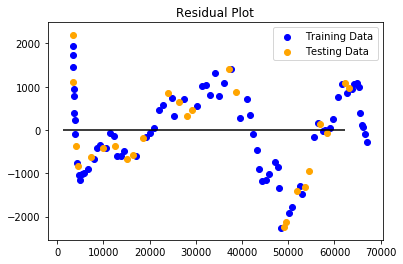

In [57]:
import matplotlib.pyplot as plt
predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.002159410412191383, R2: 0.9976340151090201


In [ ]:
## basic count of tweets
# tweet_count=[]
# counter2 = 0
# for city in cities_in_va:
#     for row in tweets_df['city']:
#         if row == city:
#             counter2 +=1
#     tweet_count.append({city: counter2})
#     counter2 = 0
    
# tweet_count


# # iterate two columns
# tuple_df =tweets_df[['city','tokenized_tweets']]
# for a, b in tuple_df.itertuples(index=False):
#     print (a, b)
